# Airbnb Price Prediction
## Introduction
Since its inception in 2008, Airbnb has become the undisputed leader of shared economy. It not only provides cheap rentals and local interaction, but also serves as a means of earning for the property owner<sup>(1)</sup>. Price is one of the most important factors for selection of a listing<sup>(4)</sup>. Because of the growing popularity of Airbnb, a lot of studies have focussed on what factors affect the pricing of Airbnb listings<sup>(2)(3)</sup>. For example, (4) employed a Generalized Linear Model as well as a Geographically Weighted Regression Model to identify various factors affecting the price. 

The main aim of this project is to use various machine learning algorithms to find the factors which affect the price of a listing in the city of Edinburgh, UK. Initially, some data preprocessing is done to clean some attributes and handle missing values. Folium is used to draw HeatMap of the listings and average price is plotted for each neighborhood. Then, Seaborn and Matplotlib packages are used to visualize the dataset. Next, some categorical attributes are recoded and one-hot encoding is done. Finally, 3 machine learning algorithms are applied to the dataset; K-Nearest Neighbors Regressor, Random Forest Regressor and LightGBM. Mean squared error and R<sup>2</sup> values are calculated for each model.   

The dataset for this project was downloaded as a csv file from the website InsideAirbnb (insideairbnb.com). InsideAirbnb employs data scraping methods to collect and store data from the Airbnb website. The csv file consists of all the details for Airbnb listings in Edinburgh. 

## Importing Libraries and dependencies

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import norm
from shapely.geometry import Point, Polygon
import folium

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor


## Import data and do some EDA

In [2]:
listings = pd.read_csv('listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,15420,https://www.airbnb.com/rooms/15420,20210308204920,2021-03-12,Georgian Boutique Apt City Centre,"Stunning, impeccably refurbished spacious grou...","The neighbourhood is in the historic New Town,...",https://a0.muscache.com/pictures/cf69631f-4194...,60423,https://www.airbnb.com/users/show/60423,...,10.0,10.0,10.0,NaN,f,1,1,0,0,2.75
1,38628,https://www.airbnb.com/rooms/38628,20210308204920,2021-03-15,Edinburgh Holiday Let,Brunstane - Daiches Braes (close to Portobello...,Quiet and easy access to outside.,https://a0.muscache.com/pictures/d9885120-178e...,165635,https://www.airbnb.com/users/show/165635,...,10.0,10.0,10.0,NaN,f,2,2,0,0,0.68
2,44009,https://www.airbnb.com/rooms/44009,20210308204920,2021-03-13,"Very Spacious, Well Lit, Double Room, Very Cen...","Imagine living in a beautiful, well lit, very ...",The flat is very central. It is 2mins from the...,https://a0.muscache.com/pictures/35cda67b-f2a0...,192586,https://www.airbnb.com/users/show/192586,...,9.0,9.0,9.0,NaN,f,1,0,1,0,0.30
3,54188,https://www.airbnb.com/rooms/54188,20210308204920,2021-03-13,The Four Sisters Boatel,"A first for Scotland, The Four Sisters Boatel ...",The Four Sisters Boatel Is moored in The Lochr...,https://a0.muscache.com/pictures/11251d67-980e...,253850,https://www.airbnb.com/users/show/253850,...,9.0,10.0,9.0,NaN,t,1,1,0,0,0.33
4,55881,https://www.airbnb.com/rooms/55881,20210308204920,2021-03-15,Lovely central apartment sleeps 6,Lovely characterful Victorian tenement apartme...,NaN,https://a0.muscache.com/pictures/84332374/f268...,264345,https://www.airbnb.com/users/show/264345,...,10.0,10.0,10.0,NaN,f,1,1,0,0,2.07


In [3]:
print(listings.columns.values)

['id' 'listing_url' 'scrape_id' 'last_scraped' 'name' 'description'
 'neighborhood_overview' 'picture_url' 'host_id' 'host_url' 'host_name'
 'host_since' 'host_location' 'host_about' 'host_response_time'
 'host_response_rate' 'host_acceptance_rate' 'host_is_superhost'
 'host_thumbnail_url' 'host_picture_url' 'host_neighbourhood'
 'host_listings_count' 'host_total_listings_count' 'host_verifications'
 'host_has_profile_pic' 'host_identity_verified' 'neighbourhood'
 'neighbourhood_cleansed' 'neighbourhood_group_cleansed' 'latitude'
 'longitude' 'property_type' 'room_type' 'accommodates' 'bathrooms'
 'bathrooms_text' 'bedrooms' 'beds' 'amenities' 'price' 'minimum_nights'
 'maximum_nights' 'minimum_minimum_nights' 'maximum_minimum_nights'
 'minimum_maximum_nights' 'maximum_maximum_nights'
 'minimum_nights_avg_ntm' 'maximum_nights_avg_ntm' 'calendar_updated'
 'has_availability' 'availability_30' 'availability_60' 'availability_90'
 'availability_365' 'calendar_last_scraped' 'number_of_revie

The columns are quite a lot so I will be selecting a few that I think will be relevant for our analysis

In [4]:
listings = listings[["neighbourhood","host_response_rate", "host_is_superhost", "host_listings_count", "latitude", "longitude", "property_type", "room_type", "accommodates", "bathrooms", "bedrooms", "beds", "price", "minimum_nights", "maximum_nights", "availability_365","instant_bookable", "number_of_reviews", "review_scores_rating", "reviews_per_month"]]
listings.head()

,neighbourhood,host_response_rate,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_365,instant_bookable,number_of_reviews,review_scores_rating,reviews_per_month
0,"Edinburgh, City of Edinburgh, United Kingdom",100%,t,3.0,55.95689,-3.18768,Entire apartment,Entire home/apt,2,NaN,1.0,1.0,$80.00,3,30,322,f,340,99.0,2.75
1,"Edinburgh, City of Edinburgh, United Kingdom",100%,f,2.0,55.94215,-3.09640,Entire apartment,Entire home/apt,2,NaN,1.0,0.0,$45.00,4,120,339,f,56,94.0,0.68
2,"Edinburgh, Scotland, United Kingdom",NaN,f,0.0,55.93812,-3.19423,Private room in apartment,Private room,2,NaN,1.0,1.0,$45.00,2,10,90,f,38,94.0,0.30
3,"Edinburgh, United Kingdom",NaN,NaN,NaN,55.94217,-3.20863,Boat,Entire home/apt,6,NaN,3.0,2.0,$164.00,1,28,288,t,34,94.0,0.33
4,NaN,100%,t,2.0,55.95935,-3.17713,Entire apartment,Entire home/apt,6,NaN,4.0,5.0,$139.00,2,365,289,f,250,96.0,2.07


### Attribute Descriptions
Below is a description of all the selected columns:
- host_response_rate: The percentage of times when the host replies. 
- host_is_superhost: Whether the host is a superhost or not. Contains 't' for true and 'f' for false.
- host_listings_count: The total number of listings for the host
- latitude: Latitude coordinate of the observation
- longitude: Latitude coordinate of the observation
- property_type: Categorical variable type of property in the listing
- room_type: Type of room
- accommodates: Number of persons the listing accommodates
- bathrooms: Number of Bathrooms
- bedrooms: Number of Bedrooms
- beds: Number of beds
- price: Price of the listing
- minimum_nights: Minimum nights the room is available
- maximum_nights: Minimum nights the room is available
- availability_365: Number of days the listing was available for the whole year 
- number_of_reviews: Total number of reviews for the listing 
- review_scores_rating: The review ratings for the listing
- instant_bookable: Whether the listing can be booked immediately
- cancellation_policy: Cancellation policy for the listing
- reviews_per_month: Number of reviews per month for the listing

## Data Preprocessing
Some columns like price and host_response_rate have special characters like '$' and ',' when they should contain numeric values. To correct this, the special characters are removed and then the attribute type is changed to float using the 'astype' function.

In [5]:
#removing $ and , signs from columns and converting to float
cols = ["host_response_rate", "price"]
for col in cols:
    listings[col] = listings[col].str.replace(',', '')
    listings[col] = listings[col].str.replace('$', '')
    listings[col] = listings[col].str.replace('%', '')
    listings[col] = listings[col].astype(float)

C:\Users\pc\anaconda3\envs\new\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """


Some attributes have a range of values. For example, 'host_response_rate' is a percentage, while 'availability_365' has a maximum value of 365, and 'review_scores_rating' has a maximum value of 100. So these columns are divided by their maximum values to rescale them to values between 0 and 1. Then, the original atributes are dropped from the dataset.

In [6]:
#rescaling variables
#host_response_rate
listings['host_response_rate'] = listings['host_response_rate']/100.0
#availability
listings['availability_score'] = listings['availability_365']/365.0
#review scores ratings
listings['rating_score'] = listings['review_scores_rating']/100.0
#drop availability_365 and review_scores_rating columns
listings = listings.drop(columns = ["availability_365","review_scores_rating"])

Two attributes, 'host_is_superhost' and 'instant_bookable' have 't' and 'f' as values, which correspond to True and False respectively. These are mapped to 1 and 0 values and then converted into integer datatype.  

In [7]:
#converting host_is_superhost and instant_bookable values from strings to 0 and 1
listings['host_is_superhost'] = (listings['host_is_superhost'] == 't').astype(int)
listings['instant_bookable'] = (listings['instant_bookable'] == 't').astype(int)

Looking at the details of the dependent variable 'price', it has a mean value of 137, standard deviation of 620 and a maximum of 17698. So, we can have all the price values higher than 1000 are filtered out and a histogram is plotted. 

In [8]:
listings['price'].describe()

count     6432.000000
mean       137.768035
std        620.365106
min          0.000000
25%         47.000000
50%         71.000000
75%        117.000000
max      17698.000000
Name: price, dtype: float64

C:\Users\pc\anaconda3\envs\new\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


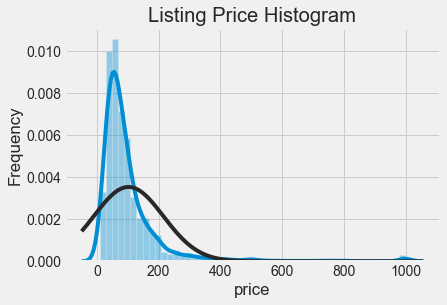

In [10]:
listings = listings[(listings['price']<1000) & (listings['price'] > 0)]
sns.distplot(listings['price'] , fit=norm);
plt.ylabel('Frequency')
plt.title('Listing Price Histogram')
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

The distribution of price seems to be skewed to the right. So we apply log to the price and store it in a new attribute named 'log_price'. Plotting the histogram of the log_price, we see that is resembles a normal distrbution. Hence, we will use log_price as the dependent variable in our analysis.

C:\Users\pc\anaconda3\envs\new\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\envs\new\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log of Listing Price Histogram')

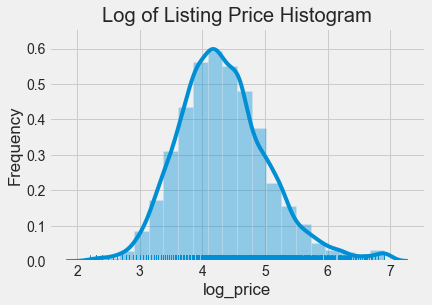

In [11]:
listings['log_price'] = np.log(listings['price'])
sns.distplot(listings['log_price'], bins = 20, kde=True, rug=True);
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
plt.ylabel('Frequency')
plt.title('Log of Listing Price Histogram')

Next, I will find the missing values in the dataset. I will calculate the ratio of missing values for all columns and then sort them in descending order. We see that apart from`bathrooms` which has all of its entries missing, `host_response_rate` has the highest number of missing values (39.5 percent). Then we plot a bar graph of the missing values. 

In [12]:
#finding the ratio of missing values in the columns
listings_na = (listings.isnull().sum() / len(listings)) * 100
listings_na = listings_na.drop(listings_na[listings_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :listings_na})
missing_data.head()

,Missing Ratio
bathrooms,100.000000
host_response_rate,39.592157
neighbourhood,25.411765
rating_score,15.325490
reviews_per_month,14.415686


Text(0.5, 1.0, 'Percent missing data by feature')

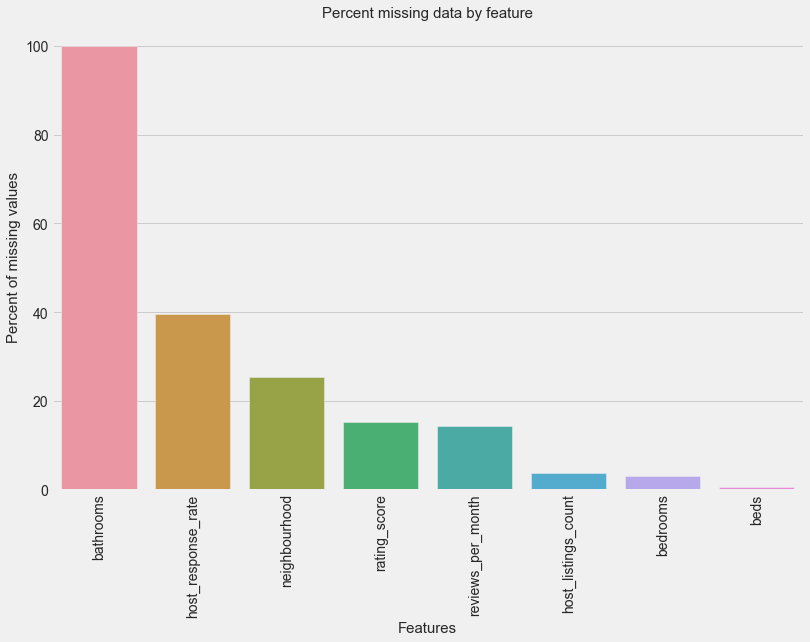

In [13]:
#plotting the ratio of missing values
f, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation='90')
sns.barplot(x=listings_na.index, y=listings_na)
plt.style.use('fivethirtyeight')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

The percentage of `neighbourhood` data that is missing is too high. I tried correcting this by filling the missing rows with pandas' forward fill method. But it wouldn't matter because we have a `neighbourhood` dataset we will be using

In [14]:
listings['neighbourhood'].value_counts()

Edinburgh, Scotland, United Kingdom                           3559
Edinburgh, United Kingdom                                      852
Edinburgh, City of Edinburgh, United Kingdom                    71
Edinburgh, Midlothian, United Kingdom                           60
Edinburgh , Scotland, United Kingdom                            28
                                                              ... 
South Queensferry, Edinburgh, West Lothian, United Kingdom       1
South Queensferry , Scotland, United Kingdom                     1
Edinburgh, Morningside Terrace, United Kingdom                   1
Edinburgh, Abbey Hill, United Kingdom                            1
Edinburgh, Midlothian, Scotland, United Kingdom                  1
Name: neighbourhood, Length: 85, dtype: int64

In [15]:
#finding the ratio of missing values in the columns
listings_na = (listings.isnull().sum() / len(listings)) * 100
listings_na = listings_na.drop(listings_na[listings_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :listings_na})
missing_data.head()

,Missing Ratio
bathrooms,100.000000
host_response_rate,39.592157
neighbourhood,25.411765
rating_score,15.325490
reviews_per_month,14.415686


Text(0.5, 1.0, 'Percent missing data by feature')

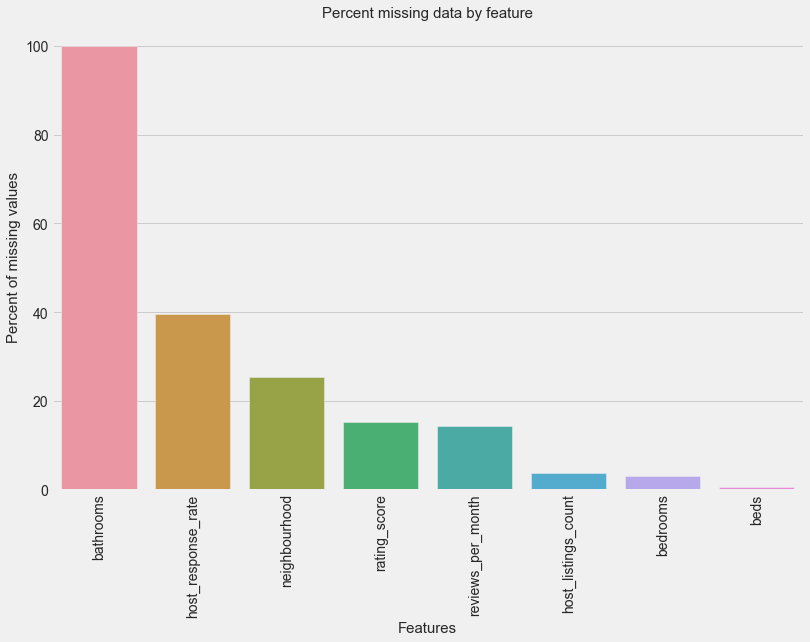

In [16]:
#plotting the ratio of missing values
f, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation='90')
sns.barplot(x=listings_na.index, y=listings_na)
plt.style.use('fivethirtyeight')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

Text(0.5, 1.0, 'Percent missing data by feature')

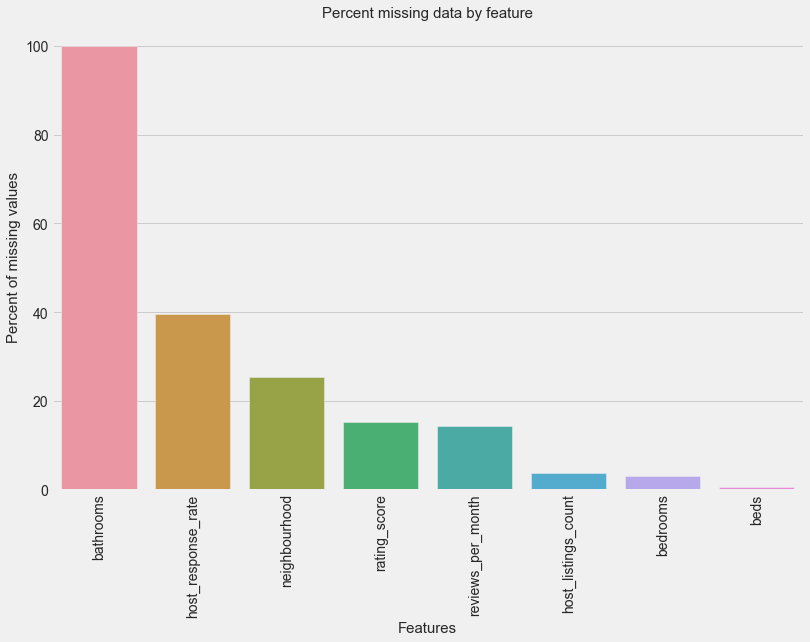

In [17]:
#plotting the ratio of missing values
f, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation='90')
sns.barplot(x=listings_na.index, y=listings_na)
plt.style.use('fivethirtyeight')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

The `bathrooms` and `host_response_rate` and `rating_score` columns have a high percentage of null values. We fill these null values with 0, as the absence of a value for these attributes generally refers to them having a value of 0. 

In [18]:
cols =['bathrooms','host_response_rate', 'rating_score']
for col in cols:
    listings[col]=listings[col].fillna(0)

Now having filled the chunk of our missing data with some value, we can conveniently drop all remaining missing rows

In [19]:
listings=listings.dropna()

In [20]:
listing_not = (listings.isnull().sum()/len(listings))*100
listing_not=listing_not.drop(listing_not[listing_not==0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'missing ratio':listing_not})
missing_data.head()

,missing ratio


Now that there are no missing values in the dataframe, Data preprocessing is complete and we now move on to data visualization.

## Data Visualization

In this section, we explore the dataset further and draw plots and maps using various packages. Initially, we combine the listing data with the neighborhoods shapefile using spatial join function. Then we plot the HeatMap of listings using folium, and calculate the average price per neighborhood. Next, we explore the other variables and look into their relationship with the price attribute. 

Firstly, I will download the neighborhoods shapefile for Edinburgh and then import it into a Geopandas dataframe. Next, I will show the first few rows of the dataset using the 'head' method. We see that the geometry attribute has the coordinates for neighborhood polygons.

We now draw a boxplot of the price for each neighborhood. The listings are grouped by neighborhoods, sorted according to price and then plotted. This plot also shows that the City Centre has the highest average price for listings. 

In [33]:
edinburg = gpd.read_file('neighbourhoods.geojson')
edinburg.to_crs= {'init':'epsg:4326'}
edinburg.head()

,neighbourhood,neighbourhood_group,geometry
0,Balerno and Bonnington Village,None,"MULTIPOLYGON (((-3.35805 55.91088, -3.35950 55..."
1,Currie West,None,"MULTIPOLYGON (((-3.30557 55.92039, -3.30418 55..."
2,Currie East,None,"MULTIPOLYGON (((-3.30808 55.89430, -3.30870 55..."
3,Baberton and Juniper Green,None,"MULTIPOLYGON (((-3.28635 55.91564, -3.28617 55..."
4,Bonaly and The Pentlands,None,"MULTIPOLYGON (((-3.30808 55.89430, -3.30834 55..."


In [31]:
edinburg['neighbourhood']

Oxgangs                                       1
Morningside                                   1
Carrick Knowe                                 1
Deans Village                                 1
Jewel, Brunstane and Newcraighall             1
                                             ..
Canongate, Southside and Dumbiedykes          1
Joppa                                         1
Gracemount, Southhouse and Burdiehouse        1
Restalrig (Loganlea) and Craigentinny West    1
Bingham, Magdalene and The Christians         1
Name: neighbourhood, Length: 111, dtype: int64

In [35]:
nb = pd.read_csv('neighborhoods.csv')
nb.head()

,neighbourhood_group,neighbourhood
0,NaN,Abbeyhill
1,NaN,Baberton and Juniper Green
2,NaN,Balerno and Bonnington Village
3,NaN,Balgreen and Roseburn
4,NaN,"Barnton, Cammo and Cramond South"


In [22]:
#making geometry from latitude and longitude values and creating a geodataframe
geom = listings.apply(lambda x : Point([x["longitude"],x["latitude"]]), axis=1)
listings = gpd.GeoDataFrame(listings, geometry=geom) #geom is a Series
listings.to_crs = {'init' :'epsg:4326'}
print (listings.head())

                                  neighbourhood  host_response_rate  \
0  Edinburgh, City of Edinburgh, United Kingdom                 1.0   
1  Edinburgh, City of Edinburgh, United Kingdom                 1.0   
2           Edinburgh, Scotland, United Kingdom                 0.0   
5           Edinburgh, Scotland, United Kingdom                 1.0   
6           Edinburgh, Scotland, United Kingdom                 1.0   

   host_is_superhost  host_listings_count  latitude  longitude  \
0                  1                  3.0  55.95689   -3.18768   
1                  0                  2.0  55.94215   -3.09640   
2                  0                  0.0  55.93812   -3.19423   
5                  1                  4.0  55.95471   -3.21612   
6                  0                  1.0  55.97738   -3.18064   

               property_type        room_type  accommodates  bathrooms  ...  \
0           Entire apartment  Entire home/apt             2        0.0  ...   
1           Entire

In [29]:
#datazones = gpd.sjoin(listings, datazones_shape, op='within')
neighborhoods = gpd.sjoin(listings, edinburg, op='within')

C:\Users\pc\anaconda3\envs\new\lib\site-packages\ipykernel_launcher.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  


In [30]:
neighborhoods.head()

,neighbourhood_left,host_response_rate,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,instant_bookable,number_of_reviews,reviews_per_month,availability_score,rating_score,log_price,geometry,index_right,neighbourhood_right,neighbourhood_group
0,"Edinburgh, City of Edinburgh, United Kingdom",1.0,1,3.0,55.95689,-3.18768,Entire apartment,Entire home/apt,2,0.0,...,0,340,2.75,0.882192,0.99,4.382027,POINT (-3.18768 55.95689),47,"Old Town, Princes Street and Leith Street",None
45,"Edinburgh, United Kingdom",0.7,1,8.0,55.94688,-3.19712,Entire apartment,Entire home/apt,4,0.0,...,1,75,0.69,0.994521,0.96,4.624973,POINT (-3.19712 55.94688),47,"Old Town, Princes Street and Leith Street",None
46,"Edinburgh, United Kingdom",0.7,1,8.0,55.94771,-3.18458,Entire condominium,Entire home/apt,6,0.0,...,1,62,0.61,0.994521,0.89,4.795791,POINT (-3.18458 55.94771),47,"Old Town, Princes Street and Leith Street",None
48,"Edinburgh, United Kingdom",0.2,0,7.0,55.94779,-3.19407,Entire apartment,Entire home/apt,4,0.0,...,1,337,3.08,0.249315,0.94,4.430817,POINT (-3.19407 55.94779),47,"Old Town, Princes Street and Leith Street",None
59,"Edinburgh, Scotland, United Kingdom",1.0,1,5.0,55.94879,-3.18676,Entire apartment,Entire home/apt,2,0.0,...,0,76,0.79,0.328767,0.96,4.317488,POINT (-3.18676 55.94879),47,"Old Town, Princes Street and Leith Street",None


Now that we have the neighborhood value for each listing, we calculate the mean price for listings in each neighborhood. We use the group_by method to group the listings based on neighborhood, get the price using indexing and then use the mean method to calculate the avergae price for each neighborhood.

In [25]:
neighborhoods_price = neighborhoods.groupby('neighbourhood_right', as_index=False)['price'].mean()#group by neighbourhood - mean price
#neighborhoods_count = neighborhoods.groupby('NP_Name', as_index=False)['price'].count()
neighborhoods_price

,neighbourhood_right,price
0,Abbeyhill,109.318841
1,Baberton and Juniper Green,40.600000
2,Balerno and Bonnington Village,100.909091
3,Balgreen and Roseburn,63.105263
4,"Barnton, Cammo and Cramond South",61.000000
...,...,...
106,Trinity,93.411765
107,Trinity East and The Dudleys,100.277778
108,West Pilton,46.545455
109,Western Harbour and Leith Docks,114.313725


In [48]:
neighborhoods_price.rename(columns={'neighbourhood_right':'neighbourhood'}, inplace=True)
neighborhoods_price

,neighbourhood,price
0,Abbeyhill,109.318841
1,Baberton and Juniper Green,40.600000
2,Balerno and Bonnington Village,100.909091
3,Balgreen and Roseburn,63.105263
4,"Barnton, Cammo and Cramond South",61.000000
...,...,...
106,Trinity,93.411765
107,Trinity East and The Dudleys,100.277778
108,West Pilton,46.545455
109,Western Harbour and Leith Docks,114.313725


Now that we have the neighborhood value for each listing, we calculate the mean price for listings in each neighborhood. We use the group_by method to group the listings based on neighborhood, get the price using indexing and then use the mean method to calculate the avergae price for each neighborhood.

In [49]:
neighborhoods = edinburg.merge(neighborhoods_price, on='neighbourhood')
neighborhoods.head()

,neighbourhood,neighbourhood_group,geometry,price
0,Balerno and Bonnington Village,None,"MULTIPOLYGON (((-3.35805 55.91088, -3.35950 55...",100.909091
1,Currie West,None,"MULTIPOLYGON (((-3.30557 55.92039, -3.30418 55...",36.833333
2,Currie East,None,"MULTIPOLYGON (((-3.30808 55.89430, -3.30870 55...",58.000000
3,Baberton and Juniper Green,None,"MULTIPOLYGON (((-3.28635 55.91564, -3.28617 55...",40.600000
4,Bonaly and The Pentlands,None,"MULTIPOLYGON (((-3.30808 55.89430, -3.30834 55...",48.777778


Next, we use the Map function from the folium package to import an osm basemap for Edinburgh. The coordinates and zoom attribute are selected such that the whole city of Edinburgh is visible. 

In [36]:
def generateBaseMap(default_location=[55.9383, -3.2293], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map
basemap = generateBaseMap()

In [37]:
from folium.plugins import HeatMap
#HeatMap(data=datazones[['latitude', 'longitude']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(basemap)
HeatMap(data=neighborhoods[['latitude', 'longitude']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(basemap)
basemap

C:\Users\pc\anaconda3\envs\new\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29233 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\envs\new\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 19969 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\envs\new\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22561 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\envs\new\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 33487 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\envs\new\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26684 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\envs\new\lib\site-packages\matplotlib\backends\backend_agg.py:238: Runtim

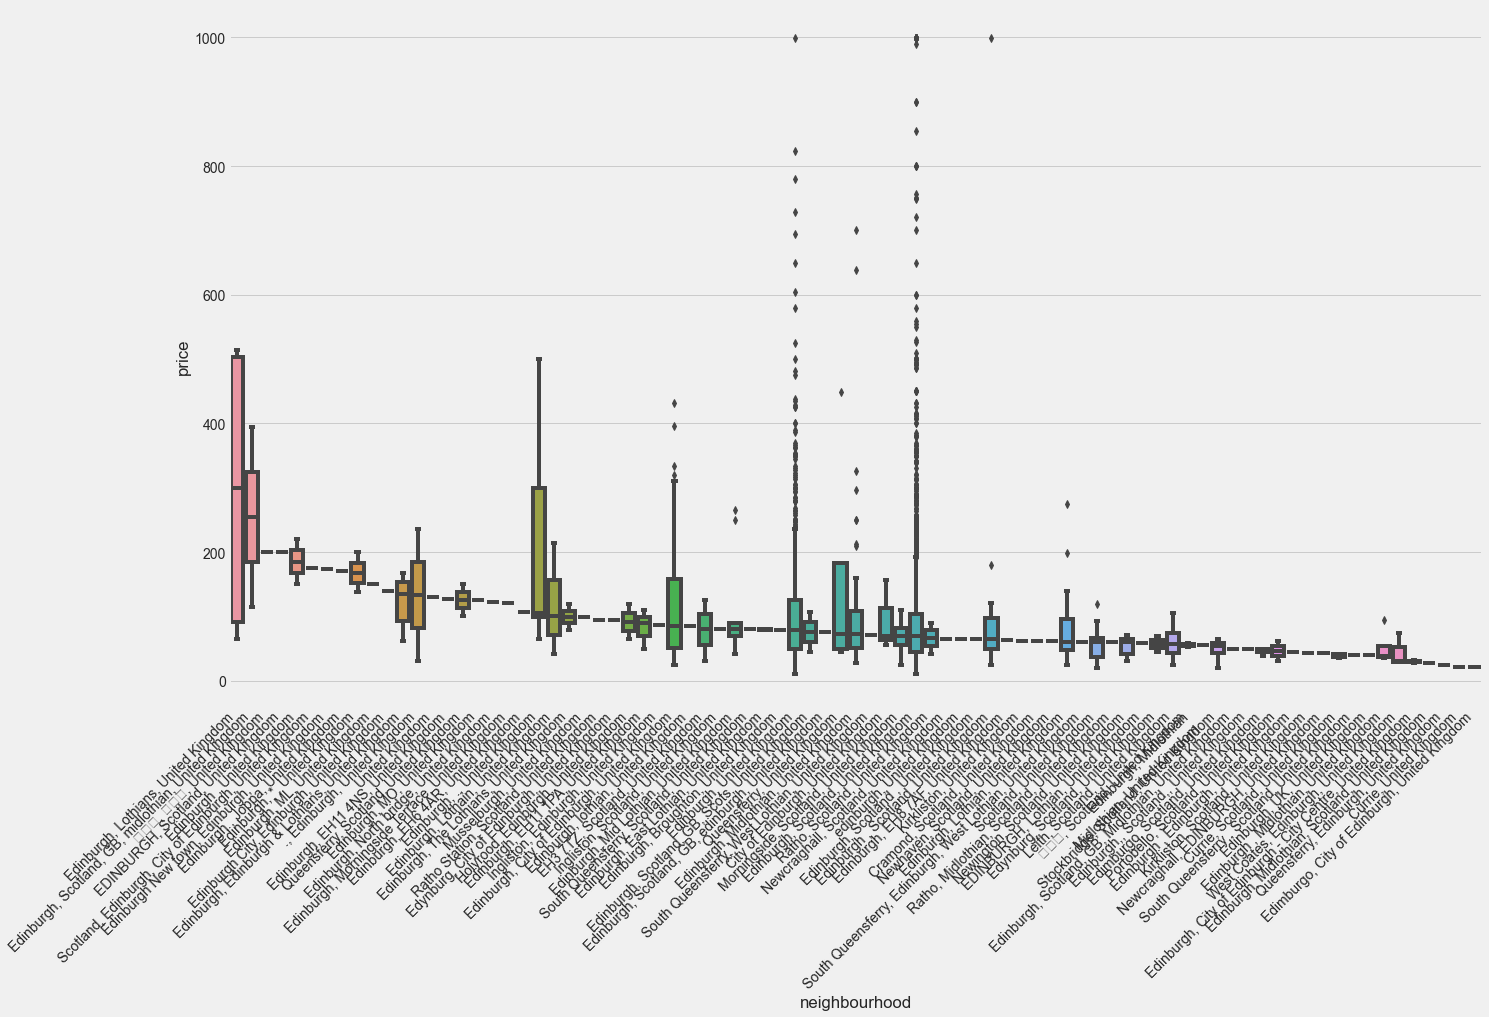

In [24]:
plt.figure(figsize=(20,12))
sort_price = listings.groupby('neighbourhood')['price'].median().sort_values(ascending=False).index
sns.boxplot(y='price', x='neighbourhood', data=listings, order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

We also draw a boxplot with property type against price.

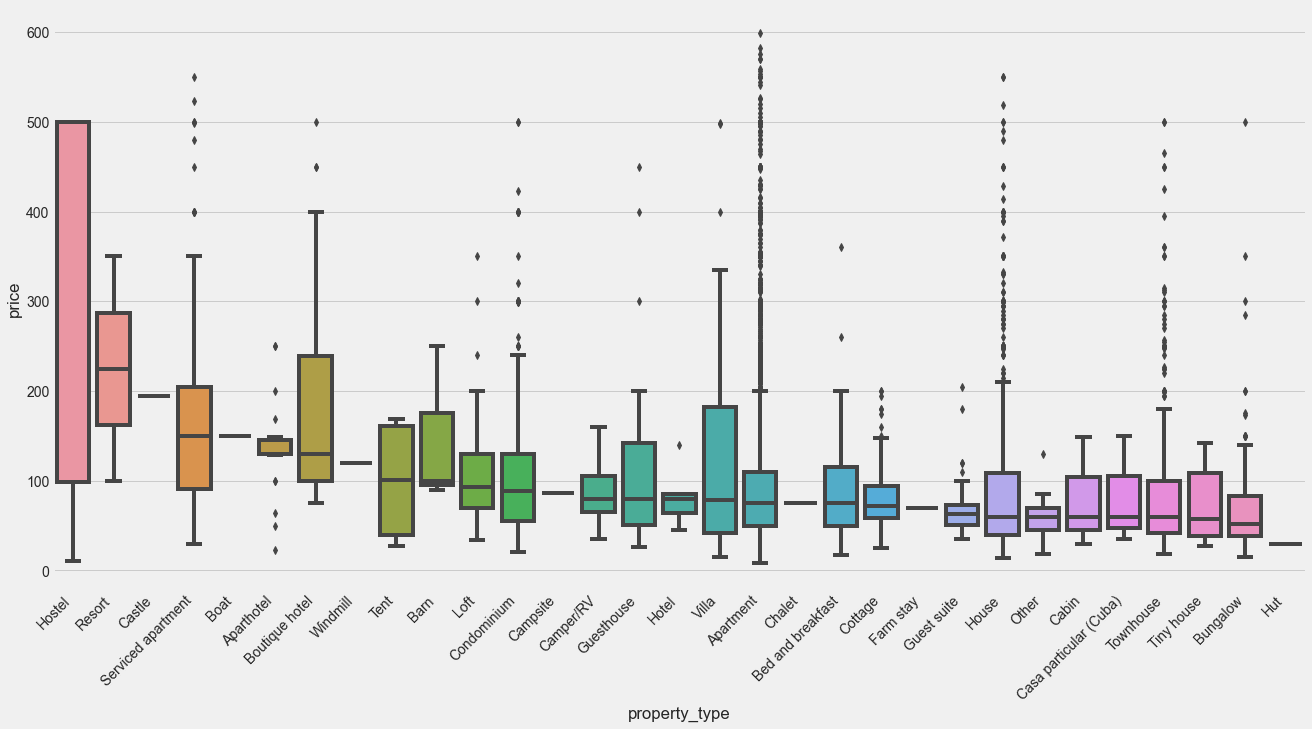

In [18]:
plt.figure(figsize=(20,10))
sort_price = listings\
                    .groupby('property_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='property_type', data=listings, order=sort_price, width=0.8)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

We then plot the type of room versus price. This shows that the average price for Hotel rooms is the highest, followed by Entire homes, Private rooms and then Shared rooms.

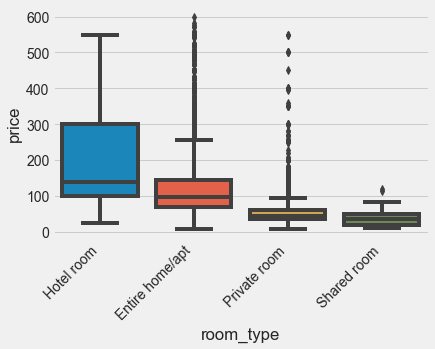

In [19]:
sort_price = listings\
                    .groupby('room_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='room_type', data=listings, order=sort_price, width=0.8)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

We also create a stacked bar graph to show the share of room type for different listing prices. This graph shows that for low prices, the proportion of private rooms is higher than entire home. This starts to decrease as the price becomes higher. Hotel room and shared rooms have fewer observations, which makes it difficult to observe any pattern. 

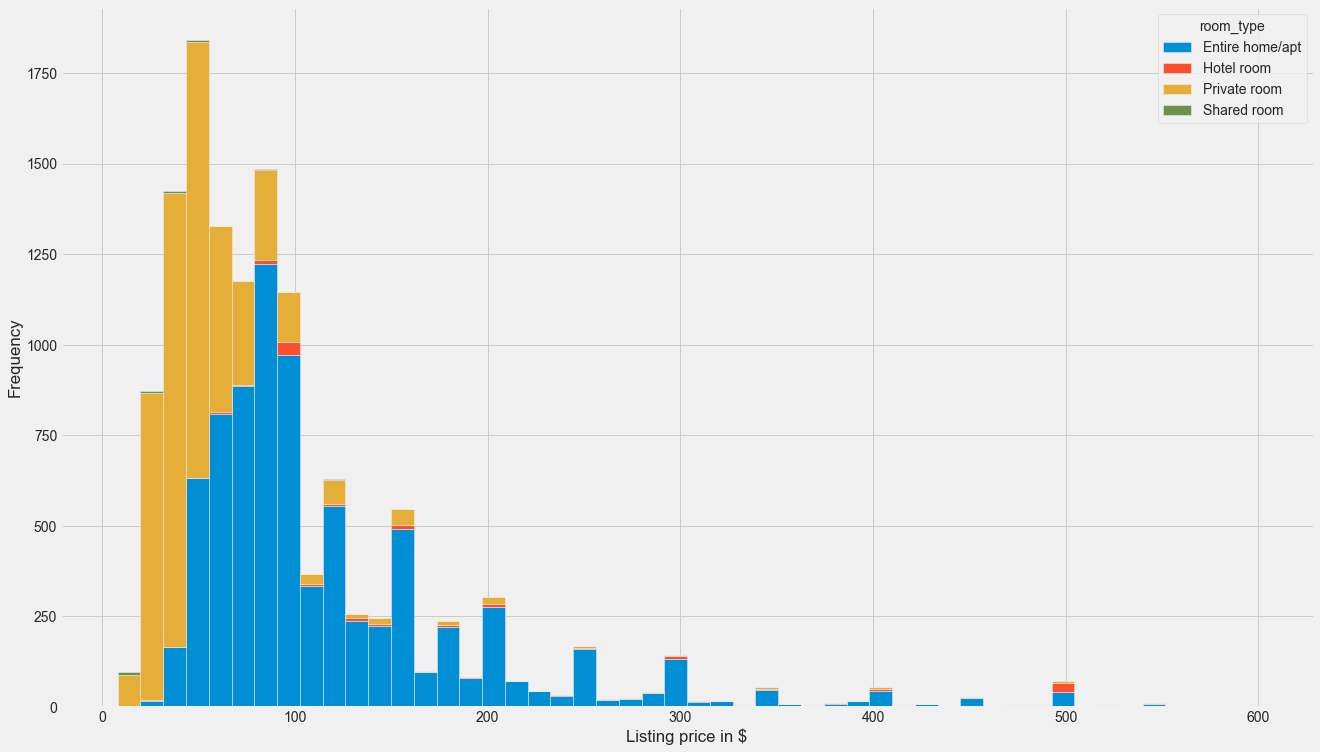

In [20]:
listings.pivot(columns = 'room_type', values = 'price').plot.hist(figsize=(20,12), stacked = True, bins=50)
plt.xlabel('Listing price in $');

Next, we draw the price against the number of beds in listings. This graph shows a positive correlation between the number of beds and price, which is intuitive as more number of beds could mean an increase in price.

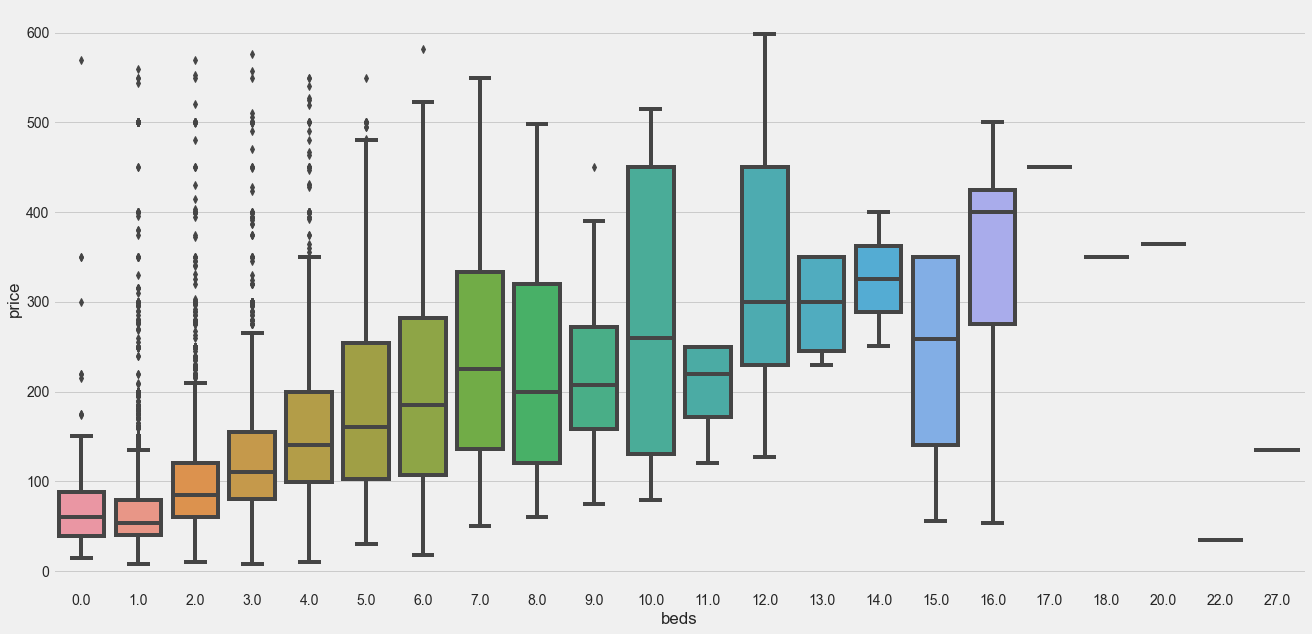

In [21]:
plt.figure(figsize=(20,10))
sns.boxplot(y='price', x='beds', data = listings)
plt.show();

We create a stacked bar graph to show the share of number of beds for different listing prices. This graph shows that for low prices, the proportion of a single bed is higher. This starts to decrease as the price becomes higher. For higher prices, listings having multiple beds have higher proportion.

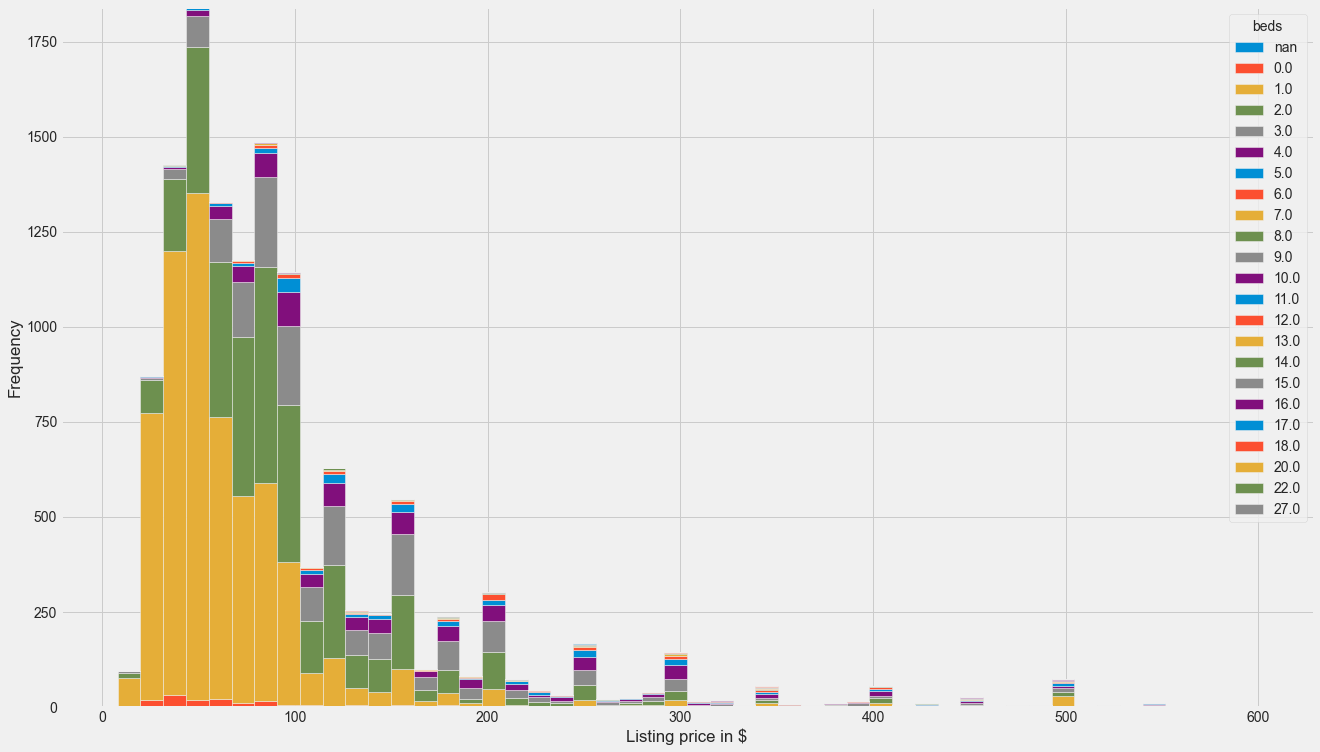

In [22]:
listings.pivot(columns = 'beds',values = 'price').plot.hist(figsize=(20,12),stacked = True,bins=50)
plt.xlabel('Listing price in $');

Now, we select the numeric attributes from the dataframe and draw a scatterplot showing the relation between each combination of attributes. 

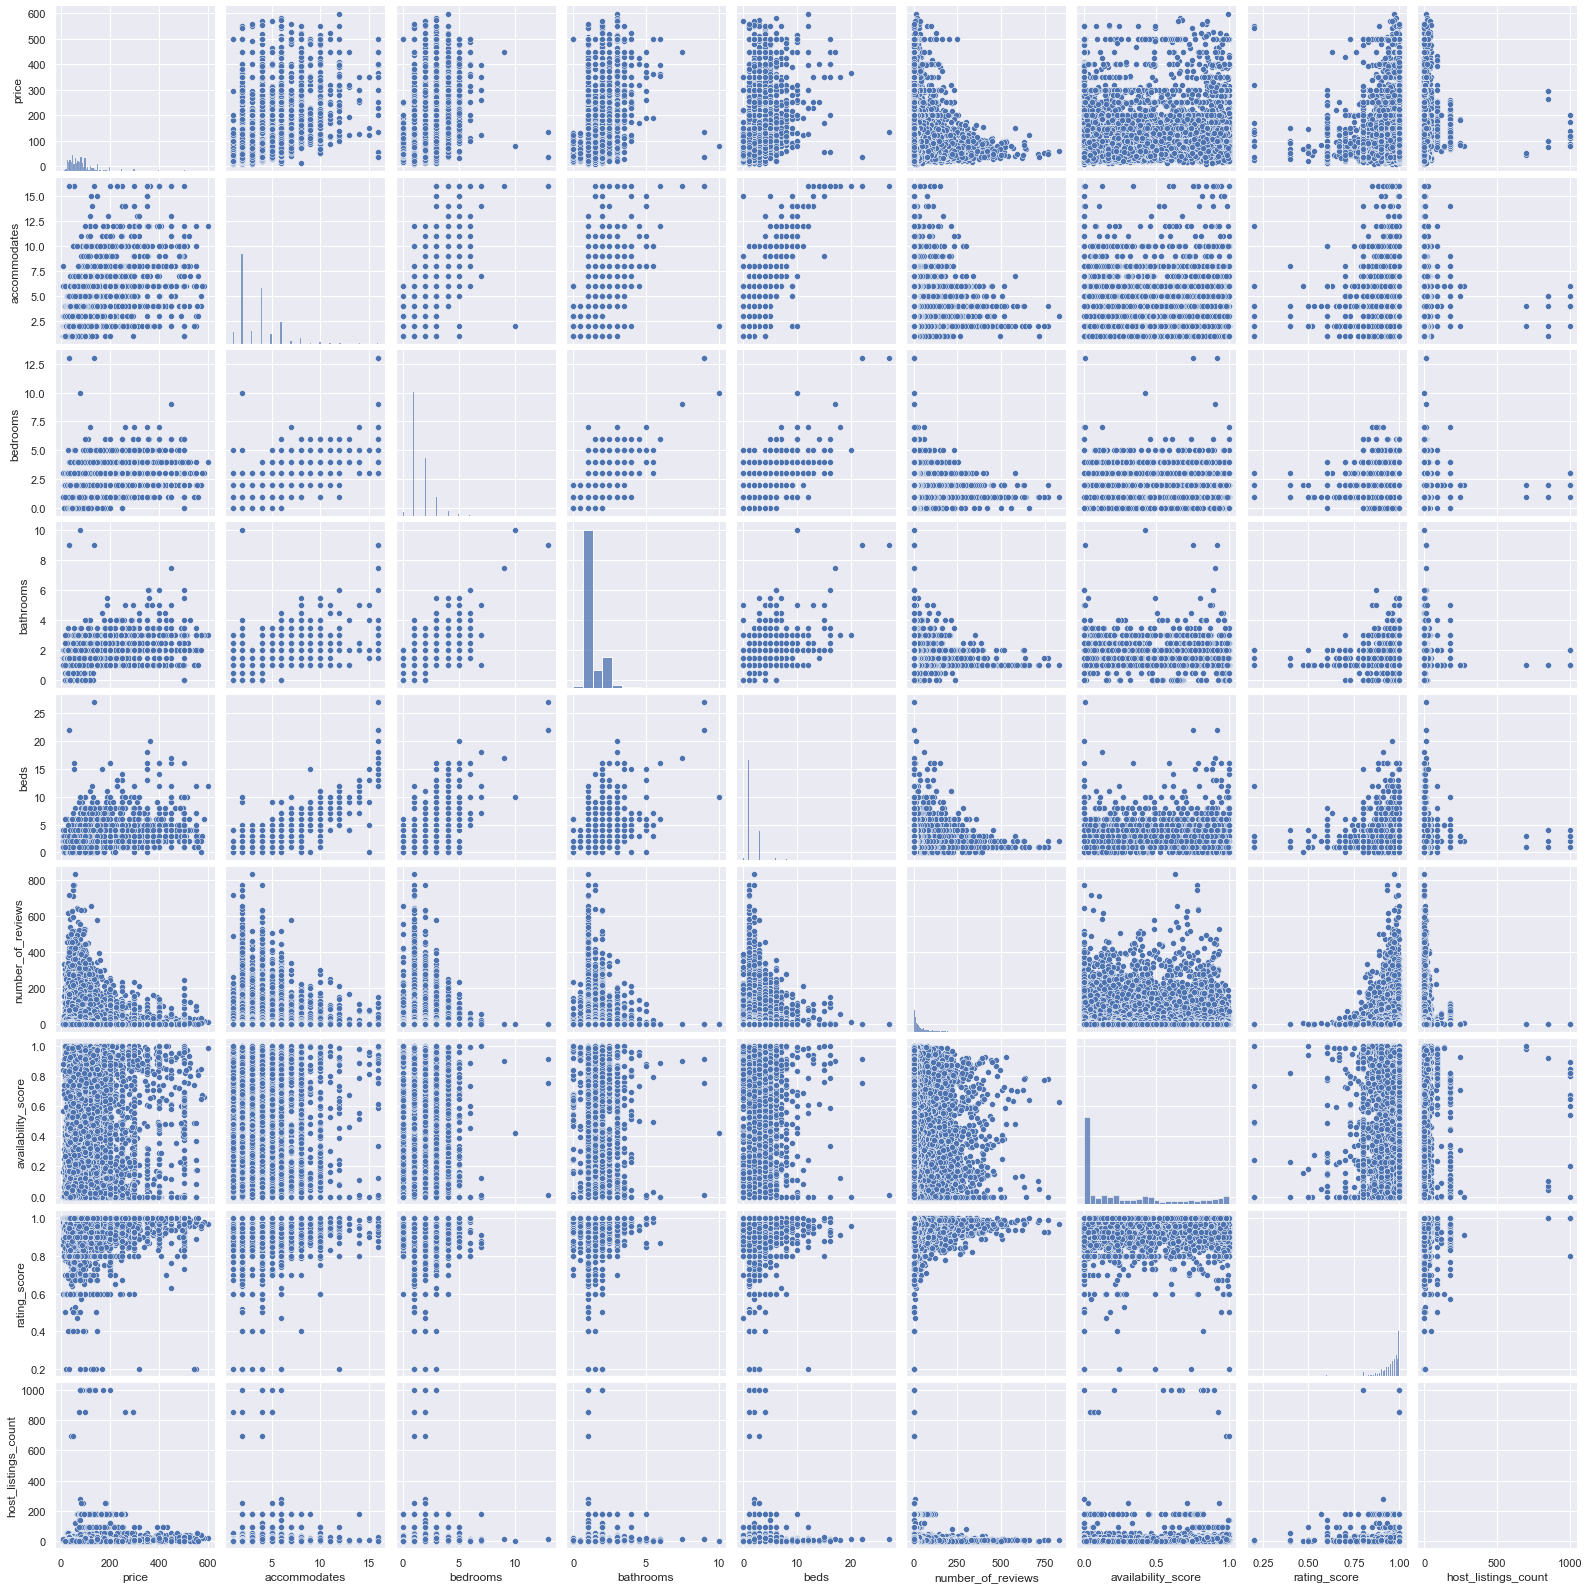

In [23]:
# scatterplot between all the attributes
sns.set()
cols = ['price', 'accommodates','bedrooms', 'bathrooms', 'beds', 'number_of_reviews', 'availability_score','rating_score','host_listings_count']
sns.pairplot(listings[cols], height = 2.5)
plt.show();

A few observations from the plot are as follows:
- Price seems to have a negative correlation with the number of reviews. This could be due to the fact that listings with high prices are not frequently taken, which results in less number of reviews.
- The attributes 'accommodates', 'bedrooms', 'bathrooms' and 'beds' seem to be positively correlated. This could be due to the fact that the number of beds, bedrooms and bathrooms tend to increase as the property accommodates more people.   

Now, for further analysis and feature engineering, we drop the location and price attributes from the dataframe.

In [25]:
listings = listings.drop(columns = ["latitude","longitude", "price"])


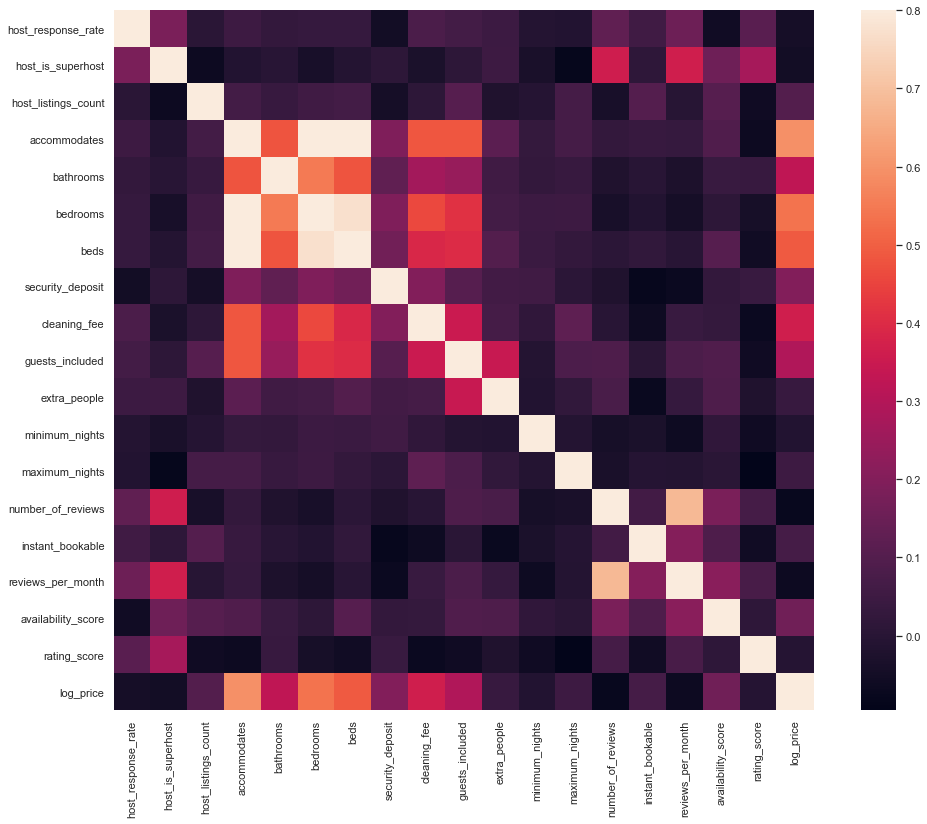

In [26]:
corrmat = listings.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

## Data Visualization
Here, I explore the dataset further and draw plots and maps using various packages. Initially, I will combine the listing data with theEdinburgh neighborhoods shapefile using spatial join function. Then plot the HeatMap of listings using folium, and calculate the average price per neighborhood. Next, I will explore the other variables and look into their relationship with the price attribute. 

We created a correlation matrix from all the features present in the dataframe. Few observations from the matrix are:
- As mentioned before, the accomodates attribute is highly correlated with the bedrooms and beds attributes. 
- The log_price attribute is correlated with the accommodates, bathrooms, bedrooms, beds, cleaning_fee and guests_included attributes.

Next, we use the Map function from the folium package to import an osm basemap for Edinburgh. The coordinates and zoom attribute are selected such that the whole city of Edinburgh is visible. 

In [42]:
def generateBaseMap(default_location=[55.9383, -3.2293], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map
basemap = generateBaseMap()

We create a Heatmap of all the listings in Edinburgh using the HeatMap class from folium. The latitude and longitude attributes are used to draw listings in the Heatmap. This map shows a high density of listings in downtown and near the sealine. 

In [43]:
from folium.plugins import HeatMap
#HeatMap(data=datazones[['latitude', 'longitude']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(basemap)
HeatMap(data=neighborhoods[['latitude', 'longitude']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(basemap)
basemap

## Feature Engineering
In this section, we prepare the features for the machine learning models. Categorical variabes are cleaned and one-hot encoding is done to prepare them for machine learning.

Firstly, we take the property_type attribute and get the number of values of each type.

In [15]:
#filling the null values with zeros
cols = ['security_deposit', 'cleaning_fee']
for col in cols:
    listings[col] = listings[col].fillna(0)

In [27]:
listings['property_type'].value_counts()

Apartment                 10398
House                      1228
Townhouse                   338
Condominium                 322
Bungalow                    103
Serviced apartment           99
Bed and breakfast            89
Boutique hotel               88
Guest suite                  55
Cottage                      55
Hostel                       45
Guesthouse                   39
Loft                         36
Villa                        31
Aparthotel                   23
Camper/RV                    23
Other                        13
Hotel                         7
Tiny house                    6
Tent                          4
Barn                          3
Casa particular (Cuba)        3
Cabin                         3
Resort                        2
Chalet                        1
Windmill                      1
Campsite                      1
Boat                          1
Castle                        1
Farm stay                     1
Hut                           1
Name: pr

We see that most of the values are of the type 'Apartment'. Another popular category is 'House'. Apart from these, there are a lot of categories with small values. Hence, we combine all the other categories into the 'Others' category. We then verify that by checking the value counts. Now the property type column has 3 categories.

On the other hand, attributes such as 'host_response_rate', 'rating_score', etc. cannot have a value of 0. So in this case, we fill them with the median value of these attributes.

In [28]:
#filling the null values with median values
cols = ['host_response_rate', 'rating_score', 'reviews_per_month', 'host_listings_count', 'host_is_superhost']
for col in cols:
    listings[col] = listings[col].fillna(listings[col].median)

Now, only the attributes 'beds', 'bathrooms' and 'bedrooms' remain with a very low percentage of null values. Since these attributes are inherently an important determinant of price, and there are fewer missing values, we will drop all rows having null values for either of these columns.

In [29]:
#drop rows having missing values for beds, bedrooms and bathrooms
listings = listings.dropna()

Now, we check again for missing values.

In [30]:
#finding the ratio of missing values in the columns
listings_na = (listings.isnull().sum() / len(listings)) * 100
listings_na = listings_na.drop(listings_na[listings_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :listings_na})
missing_data.head()

,Missing Ratio


There are no missing values in the dataframe now. Data preprocessing is complete and we now move on to data visualization.

In [31]:
#combining categories other than Apartment and House into one category 'Others'
for i, row in listings.iterrows():
    if ((row["property_type"] == "Apartment") or (row["property_type"] == "House")):
        pass
    else:
        listings.loc[i, "property_type"] = "Others"
listings['property_type'].value_counts()

Apartment    5972
Others        580
House         282
Name: property_type, dtype: int64

Similarly, we check the value counts for cancellation policy

In [32]:
listings['cancellation_policy'].value_counts()

strict_14_with_grace_period    3243
moderate                       2418
flexible                       1038
super_strict_60                 119
super_strict_30                  16
Name: cancellation_policy, dtype: int64

For this attribute, we see that there are 3 sub-categories for strict. We use the map function to combine these 3 sub-categories into one category called strict. We then check the value counts to verify the changes.

In [33]:
#recoding cancellation policy to 3 categories
listings["cancellation_policy"] = listings["cancellation_policy"].map({"flexible": "flexible", "moderate": "moderate", "strict_14_with_grace_period": "strict", "super_strict_60": "strict", "super_strict_30": "strict"})
listings['cancellation_policy'].value_counts()

strict      3378
moderate    2418
flexible    1038
Name: cancellation_policy, dtype: int64

The room type attribute has long values and spaces. We clean the attribute by removing the suffix 'room' and 'home/apt' as well as removing spaces. Then we check the value counts to see how many listings are there for each room type.  

In [34]:
#removing spaces and shortening the name of the room_type column 
listings['room_type'] = listings['room_type'].str.replace(' room', '')
listings['room_type'] = listings['room_type'].str.replace(' home/apt', '')
listings['room_type'].value_counts()

Entire     5216
Private    1560
Hotel        47
Shared       11
Name: room_type, dtype: int64

Next, we use the get_dummies function to create dummy variables for all the categorical variables in the dataset. These include property type, room type, cancellation policy and neighborhood. This creates a variable for each category with 0-1 coding.

In [35]:
#using get_dummies function for categorical variables
listings = pd.get_dummies(listings, columns=["property_type", "room_type", "cancellation_policy", "neighbourhood"])

In [34]:
neighborhood = gpd.read_file('Natural_Neighbourhoods.shp')[['NATURALCOM', 'geometry']]
neighborhood.head(10)

,NATURALCOM,geometry
0,Brunstane/Gilberstoun,"POLYGON ((331222.621 672917.153, 331336.095 67..."
1,Newcraighall,"MULTIPOLYGON (((331393.157 671982.139, 331477...."
2,Magdalene,"POLYGON ((331239.278 672530.233, 331239.278 67..."
3,Newbridge,"POLYGON ((311865.371 674075.098, 312061.569 67..."
4,Cammo/Strathalmond,"POLYGON ((316462.016 675397.099, 316543.247 67..."
5,Muirhouse,"POLYGON ((321123.613 675873.218, 321143.862 67..."
6,Granton/West Pilton,"POLYGON ((322584.315 676898.631, 322625.234 67..."
7,Broomhouse,"POLYGON ((320047.769 670836.714, 320039.644 67..."
8,Ratho Station/Ingliston/Gogar,"POLYGON ((317621.315 672786.667, 317638.477 67..."
9,South Queensferry/Dalmeny,"POLYGON ((315897.374 679452.811, 315971.127 67..."


Now, I will use the Point class from shapely to create geometries for all the listings. I will then create a GeoDataFrame from the listings dataframe using the geometry created. The coordinate reference system (crs) is set to epsg:4326. We look at the first 5 rows of the GeoDataFrame and see that the geometry attribute has indeed been added. 

In [40]:
#making geometry from latitude and longitude values and creating a geodataframe
geom = listings.apply(lambda x : Point([x["longitude"],x["latitude"]]), axis=1)
listings = gpd.GeoDataFrame(listings, geometry=geom) #geom is a Series
listings.to_crs = {'init' :'epsg:4326'}
print (listings.head())

  neighbourhood                                 host_response_rate  \
0      New Town                                                1.0   
1     Southside  <bound method NDFrame._add_numeric_operations....   
3         Leith                                                1.0   
4     Southside                                                1.0   
5      Old Town                                                1.0   

   host_is_superhost host_listings_count  latitude  longitude property_type  \
0                  1                 3.0  55.95689   -3.18768     Apartment   
1                  0                 1.0  55.94265   -3.18467          Loft   
3                  1                 1.0  55.96600   -3.17241   Condominium   
4                  0                 1.0  55.94732   -3.17851   Condominium   
5                  1                 2.0  55.95113   -3.18380     Apartment   

         room_type  accommodates  bathrooms  ...  minimum_nights  \
0  Entire home/apt             2    

We then use spatial join to combine these Geodataframes. All the listings within a neighborhood polygon are assigned to that polygon. The joined geodataframe is stored as 'neighborhoods'. 

We now merge the average price attribute with the neighborhoods geodataframe. This will help in plotting the average price for each neighborhood. We use the head function to verify that the price attribute has been addred to the geodataframe.

In [41]:
#datazones = gpd.sjoin(listings, datazones_shape, op='within')
neighborhoods = gpd.sjoin(listings, neighborhood, op='within')

C:\Users\pc\anaconda3\envs\new\lib\site-packages\ipykernel_launcher.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:27700

  


In [35]:
neighborhood.to_crs = {'init':'epsg:4326'}

Now that we have the neighborhood value for each listing, I will calculate the mean price for listings in each neighborhood. I will use the group_by method to group the listings based on neighborhood, get the price using indexing and then use the mean method to calculate the average price for each neighborhood.

## Modelling
In this section we divide the dataset into test and train datasets and run regression algorithms to predict prices of listings in the test set. Then, we use the Root Mean Squared Error (RMSE) to evaluate the performance of these models. 

First of all, we use the train_test_split function from scikit-learn to divide the dataset into train and test. The dataset is divided in the ratio 80:20. X_train contains the training features, X_test contains the test features, y_train contains the train price values and y_test contains the test values for price. After the prediction from each model, the test prices are used to calculate the mean squared error.

In [36]:
from sklearn.model_selection import train_test_split
y = listings['log_price']
x = listings.drop('log_price', axis =1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=1)

### K Nearest Neighbors Regressor
K-nearest neighbors is an algorithm that uses a similarity measure to predict the target values. The value is predicted on the basis of how closely it resembles the other points. 

Importing the module and initializing the KNeighborsRegressor object. 

In [37]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(algorithm='brute')

Fitting the training data into the knn model object and then using the predict method to predict the price values for the test set.

In [39]:
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

Calculating the root mean squared error and R2 values. We get the RMSE as 0.524 and R2 as 0.367

In [ ]:
prediction_mse = mean_squared_error(y_test, prediction)
prediction_rmse = prediction_mse ** (1/2)
print('RMSE test: %.3f' % prediction_rmse)
print('R^2 test: %.3f' % (r2_score(y_test, prediction)))